In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [269]:
df = pd.read_csv("./data/geonames-all-cities-with-a-population-1000.csv", sep=';')

myDf = df[['Name', 'Population']]
myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
myDf['Latitude'] = myDf['Latitude'].astype(float)
myDf['Longitude'] = myDf['Longitude'].astype(float)

# remove where population 0
myDf = myDf[myDf['Population'] > 0]
#sort so populated spaces will be on top when plotting
myDf = myDf.sort_values(by=['Latitude', 'Longitude'])

C:\Users\К\AppData\Local\Temp\ipykernel_15096\3132301454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
C:\Users\К\AppData\Local\Temp\ipykernel_15096\3132301454.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myDf[['Latitude', 'Longitude']] = df['Coordinates'].str.split(', ', expand=True)
C:\Users\К\AppData\Local\Temp\ipykernel_15096\3132301454.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [270]:
q_025 = myDf['Population'].quantile(0.25)
q_075 = myDf['Population'].quantile(0.75)
iqd = q_075 - q_025
upper_threshold = q_075 + 1.5 * iqd
lower_threshold = q_025 - 1.5 * iqd

myDf = myDf.loc[(myDf['Population'] <= upper_threshold) & (myDf['Population'] >= lower_threshold)]

In [271]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
for i in range (100, len(myDf), 10000):
  # df = myDf.iloc[i- 100 : i]

  # X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df['Population'], test_size=0.2, random_state=42)

  # model = LinearRegression()
  # model.fit(X_train, y_train)

  # y_pred = model.predict(X_test)

  # print(i)
  # # print('betta0: %.2f' % model.intercept_)
  # # print('betta1: %.2f' %model.coef_[0])
  # # print('betta2: %.2f' %model.coef_[1])
  # # print('model: ', f'population = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Latitude) + ({model.coef_[1]:.2f} * Longitude)')
  # print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
  # print('R^2: %.2f' % r2_score(y_test, y_pred))
  
  # # plt.figure(figsize=(10, 6))
  # # plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
  # # plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values')
  # # plt.xlabel('Test Sample Index')
  # # plt.ylabel('Population')
  # # plt.title('Actual vs Predicted Population')
  # # plt.legend()
  # # plt.grid(True)
  # # plt.show()

SyntaxError: incomplete input (3836854033.py, line 30)

R^2: 0.41340279590232
Mean squared error: 19213907.14
betta0: 8237390.61
betta1: -153930.86
betta2: -21.53
model:  population = 8237390.61 + (-153930.86 * Latitude) + (-21.53 * Longitude)


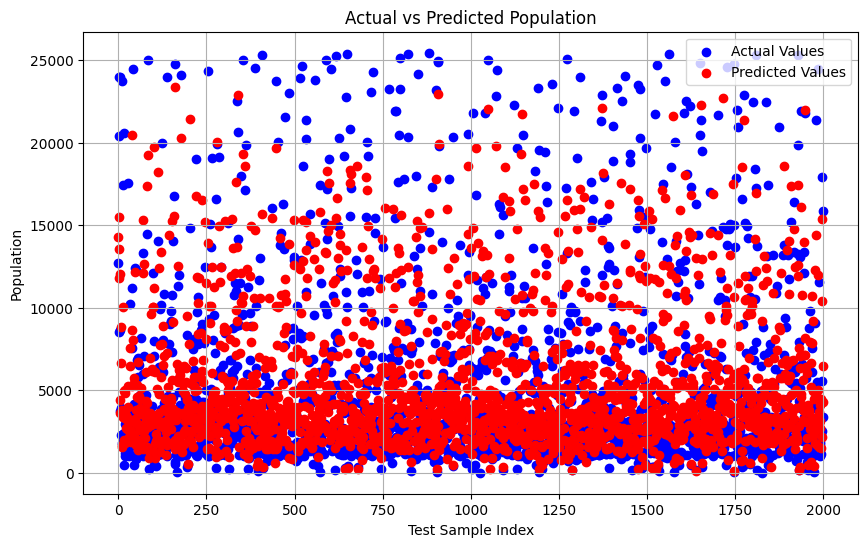

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# get 1000 least populated places
df = myDf.iloc[13000 : 23000]

X_train, X_test, y_train, y_test = train_test_split(df[['Latitude', 'Longitude']], df['Population'], test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Оценка качества
print("R^2:", r2_score(y_test, y_pred_rf))
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred_rf))

print('betta0: %.2f' % model.intercept_)
print('betta1: %.2f' %model.coef_[0])
print('betta2: %.2f' %model.coef_[1])
print('model: ', f'population = {model.intercept_:.2f} + ({model.coef_[0]:.2f} * Latitude) + ({model.coef_[1]:.2f} * Longitude)')

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred_rf)), y_pred_rf, color='red', label='Predicted Values')
plt.xlabel('Test Sample Index')
plt.ylabel('Population')
plt.title('Actual vs Predicted Population')
plt.legend()
plt.grid(True)
plt.show()

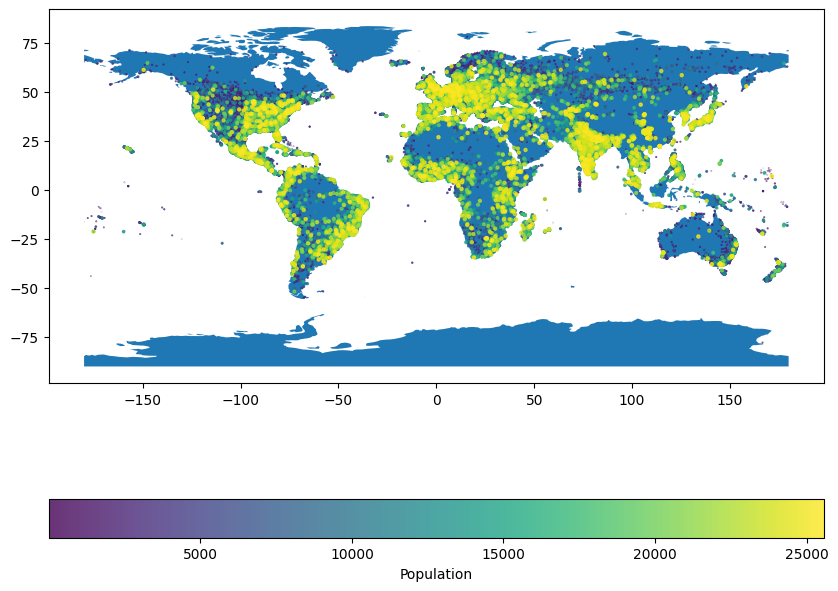

In [ ]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import matplotlib.pyplot as plt

df = myDf

df = df.sort_values(by=['Population'])

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
# gdf.plot(ax=world.plot(figsize=(10, 10)), marker='o', c=df['Population'], markersize=3);

world.plot(figsize=(10, 10))
plt.scatter(x=df['Longitude'], y=df['Latitude'], c=df['Population'], s=df['Population']/5000, alpha=0.8)
plt.colorbar(label='Population', orientation= 'horizontal')

c:\Program Files\Python312\Lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


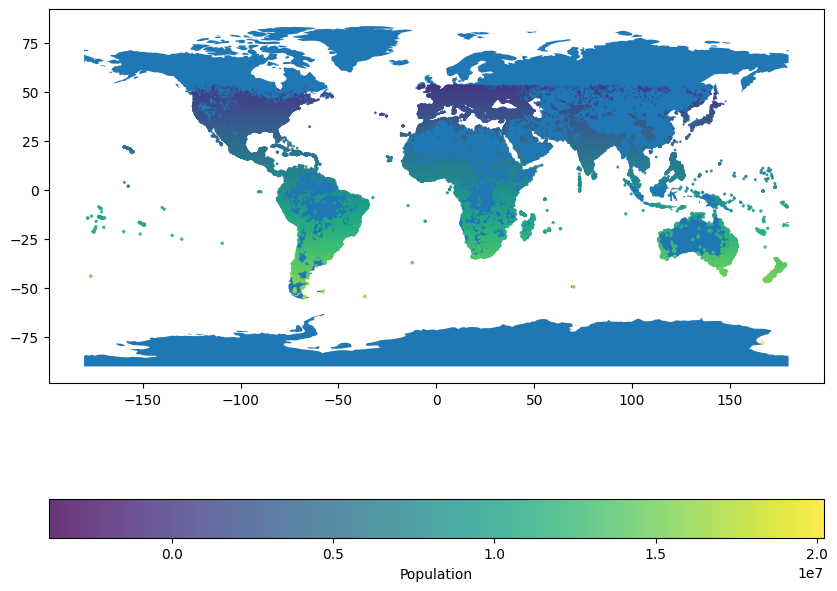

In [272]:
df = myDf

df = df.sort_values(by=['Population'])

Pop = model.intercept_ + model.coef_[0]* df['Latitude'] + model.coef_[1] * df['Longitude']

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
# gdf.plot(ax=world.plot(figsize=(10, 10)), marker='o', c=df['Population'], markersize=3);

world.plot(figsize=(10, 10))
plt.scatter(x=df['Longitude'], y=df['Latitude'], c=Pop, s=Pop/5000000, alpha=0.8)
plt.colorbar(label='Population', orientation= 'horizontal')

plt.show()